# PROYEK ANALISIS DATA: BIKE SHARING

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Wrangling

## Gathering Data

In [2]:
# Mengakses dan melihat data day.csv dalam day_df
day_df = pd.read_csv("data/day.csv", delimiter=",")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
# Mengakses dan melihat daya hour.csv dalam hour_df
hour_df = pd.read_csv("data/hour.csv", delimiter=",")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Assesing Data

In [4]:
# Cek informasi day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
# Cek missing values pada day_df
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
# Cek duplikat pada day_df
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [7]:
# Cek parameter statistik day_df
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [8]:
# Cek informasi hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
# Cek missing values pada hour_df
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
# Cek duplikat pada hour_df
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [11]:
# Cek parameter statistik hour_df
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Kesimpulan:
1. Nama kolom kurang jelas. Kolom ```instant, dteday, holiday, workingday, weathersit, hum, mnth, cnt, hr, yr``` akan diperbaiki
2. Tipe data ```dteday``` sebaiknya menggunakan datetime
3. Tipe data ```season, holiday, weekday, weather_condition, is_workingday, month, year, hour``` dalam dataset ini sebaik bertipe category

## Cleaning Data

In [12]:
# Penamaan ulang day_df dan hour_df
rename ={'instant':'id',
        'dteday':'datetime',
        'holiday':'is_holiday',
        'workingday':'is_workingday',
        'weathersit':'weather_condition',
        'hum':'humidity',
        'mnth':'month',
        'cnt':'total_count',
        'hr':'hour',
        'yr':'year'}

day_df.rename(columns=rename ,inplace=True)
hour_df.rename(columns=rename ,inplace=True)
hour_df.rename(columns={'hr':'hour'} ,inplace=True)

# Mengubah tipe data hour_df dan day_df
hour_df['datetime'] = pd.to_datetime(hour_df.datetime)
day_df['datetime'] = pd.to_datetime(day_df.datetime)

hour_df['season'] = hour_df.season.astype('category')
hour_df['is_holiday'] = hour_df.is_holiday.astype('category')
hour_df['weekday'] = hour_df.weekday.astype('category')
hour_df['weather_condition'] = hour_df.weather_condition.astype('category')
hour_df['is_workingday'] = hour_df.is_workingday.astype('category')
hour_df['month'] = hour_df.month.astype('category')
hour_df['year'] = hour_df.year.astype('category')
hour_df['hour'] = hour_df.hour.astype('category')

day_df['season'] = day_df.season.astype('category')
day_df['is_holiday'] = day_df.is_holiday.astype('category')
day_df['weekday'] = day_df.weekday.astype('category')
day_df['weather_condition'] = day_df.weather_condition.astype('category')
day_df['is_workingday'] = day_df.is_workingday.astype('category')
day_df['month'] = day_df.month.astype('category')
day_df['year'] = day_df.year.astype('category')

In [13]:
# Cek informasi day_df dan hour_df
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 731 non-null    int64         
 1   datetime           731 non-null    datetime64[ns]
 2   season             731 non-null    category      
 3   year               731 non-null    category      
 4   month              731 non-null    category      
 5   is_holiday         731 non-null    category      
 6   weekday            731 non-null    category      
 7   is_workingday      731 non-null    category      
 8   weather_condition  731 non-null    category      
 9   temp               731 non-null    float64       
 10  atemp              731 non-null    float64       
 11  humidity           731 non-null    float64       
 12  windspeed          731 non-null    float64       
 13  casual             731 non-null    int64         
 14  registered

# Exploratory Data Analysis

### Pertanyaan Analisis
1. Di hari apa jumlah sepeda paling banyak digunakan?
2. Pada jam berapa jumlah sepeda paling banyak digunakan?
3. Pada cuaca seperti apa jumlah sepeda paling banyak digunakan?
4. Bagaimana peningkatan atau penurunan penggunaan sepeda secara ekstrim terkait dengan suatu kejadian?

In [14]:
# Mengelompokan day_df berdasarkan hari dan melihat jumlah penggunaan sepeda
day_df.groupby(by="weekday", observed=False).total_count.sum().sort_values(ascending=False)

weekday
5    487790
4    485395
6    477807
3    473048
2    469109
1    455503
0    444027
Name: total_count, dtype: int64

In [15]:
# Mengelompokan hour_df berdasarkan jam dan melihat jumlah penggunaan sepeda
hour_df.groupby(by="hour", observed=False).total_count.sum().sort_values(ascending=False)

hour
17    336860
18    309772
8     261001
16    227748
19    226789
13    184919
12    184414
15    183149
14    175652
20    164550
9     159438
7     154171
11    151320
10    126257
21    125445
22     95612
23     63941
6      55132
0      39130
1      24164
2      16352
5      14261
3       8174
4       4428
Name: total_count, dtype: int64

In [16]:
# Mengelompokan day_df berdasarkan cuaca dan melihat jumlah penggunaan sepeda
day_df.groupby(by="weather_condition", observed=False).total_count.sum().sort_values(ascending=False)

weather_condition
1    2257952
2     996858
3      37869
Name: total_count, dtype: int64

In [17]:
# Mengelompokan hour_df berdasarkan cuaca dan melihat jumlah penggunaan sepeda
hour_df.groupby(by="weather_condition", observed=False).total_count.sum().sort_values(ascending=False)

weather_condition
1    2338173
2     795952
3     158331
4        223
Name: total_count, dtype: int64

# Visualisasi Data

## Pertanyaan 1: Di hari apa jumlah sepeda paling banyak digunakan?

C:\Users\User\AppData\Local\Temp\ipykernel_8260\2670060933.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Text(0.5, 0, 'Hari')

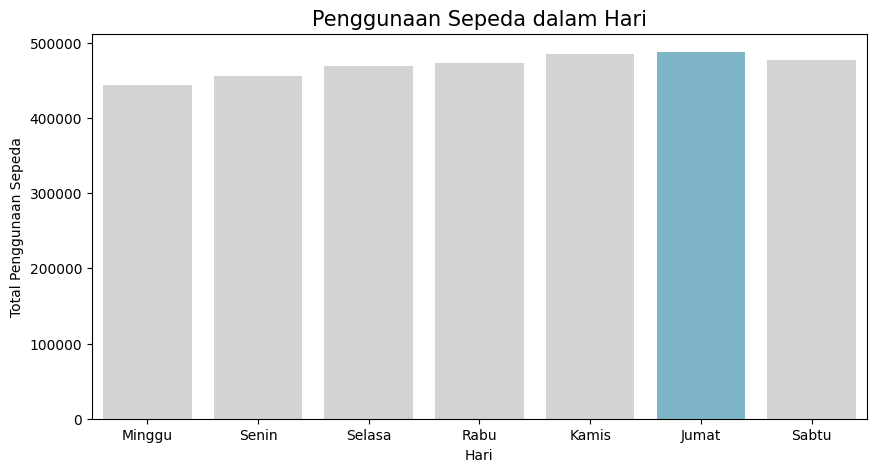

In [18]:
# Fungsi konversi nilai pada kolom weekdays dari 0-6 menjadi harinya
def convert_days(num):
    days = ['Minggu', 'Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu']
    return days[num]

# Membuat data frame baru untuk menampilkan jumlah penggunaan sepeda berdasarkan hari
byday_df = day_df.groupby(by="weekday", observed=False).total_count.sum().reset_index()
byday_df['weekday'] = byday_df.weekday.apply(convert_days)

# Plot data
colors = ["#D3D3D3" for i in range(7)]
colors[5] = "#72BCD4"

plt.figure(figsize=(10, 5))
 
sns.barplot(
    y="total_count", 
    x="weekday",
    data=byday_df,
    palette=colors
)
plt.title("Penggunaan Sepeda dalam Hari", loc="center", fontsize=15)
plt.ylabel('Total Penggunaan Sepeda')
plt.xlabel('Hari')

## Pertanyaan 2: Pada jam berapa jumlah sepeda paling banyak digunakan?  

C:\Users\User\AppData\Local\Temp\ipykernel_8260\878502754.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Text(0.5, 0, 'Jam')

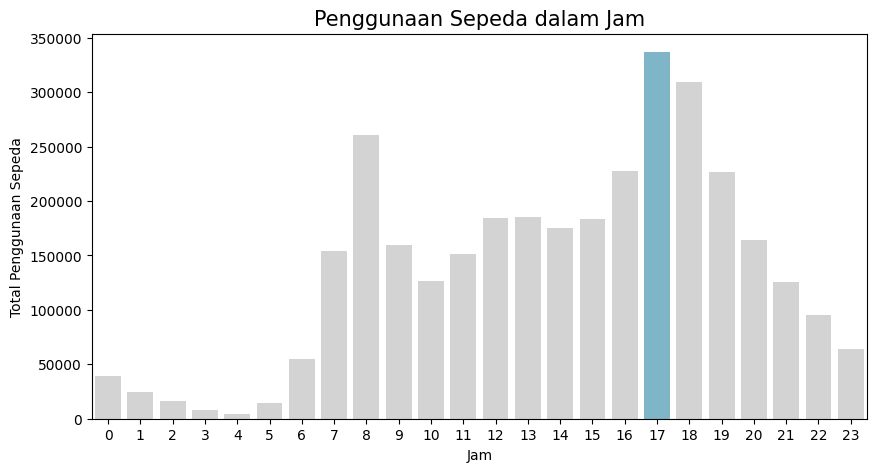

In [19]:
# Membuat data frame baru untuk menampilkan jumlah penggunaan sepeda berdasarkan jam
byhour_df = hour_df.groupby(by="hour", observed=False).total_count.sum().reset_index()

# Plot data
colors = ["#D3D3D3" for i in range(24)]
colors[17] = "#72BCD4"

plt.figure(figsize=(10, 5))
 
sns.barplot(
    y="total_count", 
    x="hour",
    data=byhour_df,
    palette=colors
)
plt.title("Penggunaan Sepeda dalam Jam", loc="center", fontsize=15)
plt.ylabel('Total Penggunaan Sepeda')
plt.xlabel('Jam')

## Pertanyaan 3:  Pada cuaca seperti apa jumlah sepeda paling banyak digunakan?

C:\Users\User\AppData\Local\Temp\ipykernel_8260\2143664791.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Text(0.5, 0, 'Cuaca')

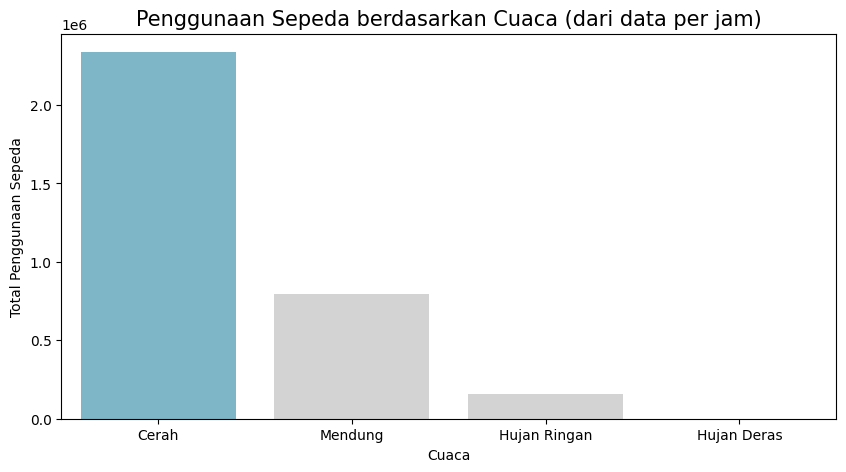

In [20]:
# Fungsi konversi nilai pada kolom weather_condition dari 1-4 menjadi cuacanya
def convert_weather(num):
    weather = ['Cerah', 'Mendung', 'Hujan Ringan', 'Hujan Deras']
    return weather[num-1]

# Membuat data frame baru untuk menampilkan jumlah penggunaan sepeda berdasarkan cuaca (dari hour_df)
byweatherhour_df = hour_df.groupby(by="weather_condition", observed=False).total_count.sum().reset_index()
byweatherhour_df['weather_condition'] = byweatherhour_df.weather_condition.apply(convert_weather)

# Plot data
colors = ["#D3D3D3" for i in range(4)]
colors[0] = "#72BCD4"

plt.figure(figsize=(10, 5))
 
sns.barplot(
    y="total_count", 
    x="weather_condition",
    data=byweatherhour_df,
    palette=colors
)
plt.title("Penggunaan Sepeda berdasarkan Cuaca (dari data per jam)", loc="center", fontsize=15)
plt.ylabel('Total Penggunaan Sepeda')
plt.xlabel('Cuaca')

## Pertanyaan 4: Bagaimana peningkatan atau penurunan penggunaan sepeda secara ekstrim terkait dengan suatu kejadian?

## Teknik MAD untuk menjawab pertanyaan 4

### Penjelasan Singkat
Teknik MAD pada prinsipnya mengikuti alur pendeteksian outlier terhadap distribusi normal.

Umumnya bila Z-Score melewati rentang (-3.5, 3.5) dalam distribusi normal maka data tersebut dapat dikelompokkan sebagai outlier.
Namun dalam kondisi seperti ini dimana ada banyak outlier, nilai mean dari distribusi normal bukanlah parameter statistik yang tepat untuk
menentukan Z-Score. Sehingga dalam metode ini parameter mean diubah dengan median, yang lebih baik untuk data dengan banyak outlier.

Pada MAD, Z-Score dihitung dengan rumus
$Z_i = \displaystyle \frac{0.6745(x_i-\bar{x})}{MAD}$

dimana $MAD = median(|x_i-\bar{x}|)$ dan $\bar{x}$ adalah median data

Pada data ini juga terdapat trend dimana penggunaan sepeda perbulannya mengalami kenaikan dan penurunan. Dengan demikian lebih baik untuk membagi data berdasarkan bulannya untuk mendeteksi anomali yang ingin dijawab.

Penjelasan lebih lengkap diambil dari sumber [ini](https://medium.com/@joaopedroferrazrodrigues/outliers-make-us-go-mad-univariate-outlier-detection-b3a72f1ea8c7)

In [21]:
# Mencari nilai anomali/outlier yaitu titik dimana
# penggunaan sepeda meningkat atau menurun secara ekstrim

# Karena ada trend naik dan turun, data dipisah per bulan untuk mendeteksi anomali

anomaly_df = pd.DataFrame()
for i in [0,1]:
    year_df = day_df[day_df['year'] == i]
    for j in range(1,13):
        month_df = year_df[year_df['month'] == j] #and day_df['year'] == i//12]
    
        # x = median data
        median = month_df['total_count'].median()
    
        # Nilai MAD = median|xi - x|
        mad = np.median([abs(month_df['total_count']-median)])
    
        # Modified Z-Score = (0.6745(xi-x)/MAD)
        # Data adalah outlier bila Z-Score diluar interval (-3.5 , 3.5)
        in_outliers = month_df[abs(0.6745*(month_df['total_count']-median)/mad) > 3.5]
    
        month_df['anomaly'] = abs(0.6745*(month_df['total_count']-median)/mad) > 3.5
        anomaly_df = pd.concat([anomaly_df, month_df])
anomaly_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 731 entries, 0 to 730
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 731 non-null    int64         
 1   datetime           731 non-null    datetime64[ns]
 2   season             731 non-null    category      
 3   year               731 non-null    category      
 4   month              731 non-null    category      
 5   is_holiday         731 non-null    category      
 6   weekday            731 non-null    category      
 7   is_workingday      731 non-null    category      
 8   weather_condition  731 non-null    category      
 9   temp               731 non-null    float64       
 10  atemp              731 non-null    float64       
 11  humidity           731 non-null    float64       
 12  windspeed          731 non-null    float64       
 13  casual             731 non-null    int64         
 14  registered     

C:\Users\User\AppData\Local\Temp\ipykernel_8260\1159379338.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_df['anomaly'] = abs(0.6745*(month_df['total_count']-median)/mad) > 3.5
C:\Users\User\AppData\Local\Temp\ipykernel_8260\1159379338.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_df['anomaly'] = abs(0.6745*(month_df['total_count']-median)/mad) > 3.5
C:\Users\User\AppData\Local\Temp\ipykernel_8260\1159379338.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

## Hasil Deteksi Anomali

In [22]:
# Menampilkan tanggal anomali
anomalies = anomaly_df[anomaly_df['anomaly'] == True]
month_list = ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni',
         'July', 'Agustus', 'September', 'Oktober', 'November', 'Desember']
for data in anomalies['datetime']:
    date = str(data)
    year = date[:4]
    month = int(date[5:7])
    day = date[8:10]
    print(f'{day} {month_list[month-1]} {year}')

18 Februari 2011
06 Maret 2011
10 Maret 2011
18 Maret 2011
04 Mei 2011
27 Agustus 2011
07 September 2011
08 September 2011
29 Oktober 2011
22 April 2012
23 April 2012
14 Mei 2012
01 Juni 2012
19 Agustus 2012
18 September 2012
02 Oktober 2012
07 Oktober 2012
28 Oktober 2012
29 Oktober 2012
30 Oktober 2012
22 November 2012
24 November 2012
25 November 2012


In [23]:
# Diperlukan untuk Streamlit
count_change = np.empty(anomaly_df['total_count'].count())
count_change[0] = 0
for i in range(1,anomaly_df['total_count'].count()):
    count_change[i] = round((anomaly_df['total_count'][i] - anomaly_df['total_count'][i-1]) / anomaly_df['total_count'][i-1] * 100, 2)
anomaly_df['count_change'] = count_change

In [24]:
# Menggabungkan semua data untuk di export
all_df = pd.merge(
    left=hour_df,
    right=anomaly_df,
    how="left",
    left_on="datetime",
    right_on="datetime"
)
all_df.head()

,id_x,datetime,season_x,year_x,month_x,hour,is_holiday_x,weekday_x,is_workingday_x,weather_condition_x,...,weather_condition_y,temp_y,atemp_y,humidity_y,windspeed_y,casual_y,registered_y,total_count_y,anomaly,count_change
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,2,0.344167,0.363625,0.805833,0.160446,331,654,985,False,0.0
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,2,0.344167,0.363625,0.805833,0.160446,331,654,985,False,0.0
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,2,0.344167,0.363625,0.805833,0.160446,331,654,985,False,0.0
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,2,0.344167,0.363625,0.805833,0.160446,331,654,985,False,0.0
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,2,0.344167,0.363625,0.805833,0.160446,331,654,985,False,0.0


In [25]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id_x                 17379 non-null  int64         
 1   datetime             17379 non-null  datetime64[ns]
 2   season_x             17379 non-null  category      
 3   year_x               17379 non-null  category      
 4   month_x              17379 non-null  category      
 5   hour                 17379 non-null  category      
 6   is_holiday_x         17379 non-null  category      
 7   weekday_x            17379 non-null  category      
 8   is_workingday_x      17379 non-null  category      
 9   weather_condition_x  17379 non-null  category      
 10  temp_x               17379 non-null  float64       
 11  atemp_x              17379 non-null  float64       
 12  humidity_x           17379 non-null  float64       
 13  windspeed_x          17379 non-

In [26]:
all_df.to_csv("all_data.csv", index=False)